In [1]:
# prepare for questions import library and define functions 
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from math import sqrt

k=3 # keeps how many clusters will be formed
dataOfFlower = pd.read_csv("iris.csv") # read data
newFlower = dataOfFlower[["sepal_length", "sepal_width"]] # filter data with sepal_length and sepal_width

listOfElements = newFlower.values.tolist()#transfer data

countOfReply = 100 #max number of reply time
limitOfError = 0.05 # the difference between the last margin of error and the penultimate margin of error is the limit value
centerOfCluster = {} #cluster center array


def calculateMean(lst, classification, centerOfCluster):
    # averages the distances of the points belonging to the center to the center and determines
    # a new center point for the center point. The center point changes as the new point arrives.
    totalXaxis = 0 # keep total length
    totalYaxis = 0 # keep total width
    if(len(lst) !=0): #  If the number k is too high, a flower belonging to some clusters cannot be assigned.
        # Therefore, the list contains an empty value.I used this condition to prevent this
        for x in lst:
            totalXaxis += x[0] #total of sepal length
        for y in lst:
            totalYaxis += y[1] #total of sepal width
        meanOfX = totalXaxis / len(lst) # calculate average of sepal length
        meanOfY = totalYaxis / len(lst) # calculate average of sepal width
        return [meanOfX, meanOfY]
    else: # If there is no flower belonging to the center, it is added here
        return centerOfCluster[classification]

# calculate distance between sepal length sepal width with euclidean
def distance(x, y):
    squared_distance = 0
    for i in range(2):
        squared_distance += (x[i] - y[i]) ** 2
    return sqrt(squared_distance)


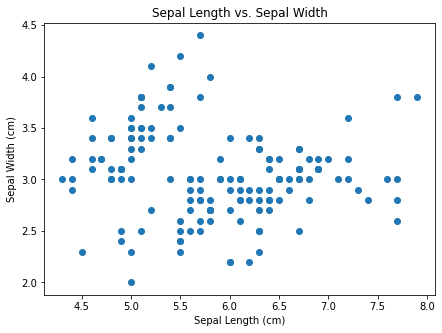

In [2]:
#Question 1
# Q1
plt.figure(figsize=(7,5))
plt.scatter(dataOfFlower["sepal_length"], dataOfFlower["sepal_width"]) # filter data with sepal length and sepal width
plt.xlabel('Sepal Length (cm)') # set x label for plot
plt.ylabel('Sepal Width (cm)') # set y label for plot
plt.title("Sepal Length vs. Sepal Width") # set title of plot
plt.show()

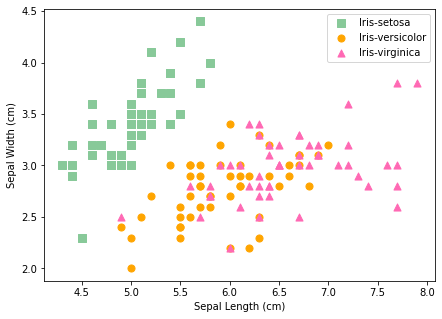

In [7]:
# Q2
setosa = dataOfFlower.loc[dataOfFlower['species'] == 'Iris-setosa'] # get setosa data from database
versicolor = dataOfFlower.loc[dataOfFlower['species'] == 'Iris-versicolor'] # get versicolor data from database
virginica = dataOfFlower.loc[dataOfFlower['species'] == 'Iris-virginica'] # get virginica data from database

plt.figure(figsize=(7,5))
plt.xlabel('Sepal Length (cm)') # set x label for plot
plt.ylabel('Sepal Width (cm)') # set y label for plot
plt.scatter(setosa["sepal_length"], setosa["sepal_width"] , s = 50, c = '#88c999', marker='s', label = 'Iris-setosa') # insert data in scatter
plt.scatter(versicolor["sepal_length"], versicolor["sepal_width"] , s = 50, c = 'orange', marker='o', label = 'Iris-versicolor') # insert data in scatter
plt.scatter(virginica["sepal_length"], virginica["sepal_width"] , s = 50, c = 'hotpink', marker='^', label = 'Iris-virginica') # insert data in scatter
plt.legend()


centerOfCluster= [] # keep center of cluster
for a in range(k):
    centerOfCluster.append([0, 1]) # insert default value


Initial Random Cluster Centers (Sepal Length - Sepal Width) in k = 3


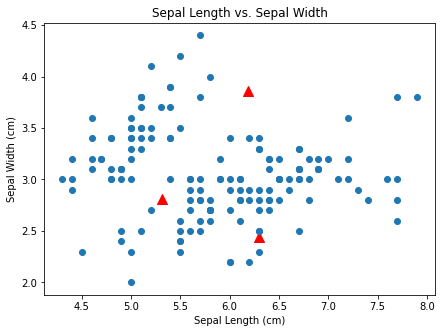

In [4]:
# Q3
plt.figure(figsize=(7,5))
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title("Initial Random Cluster Centers")


print("Initial Random Cluster Centers (Sepal Length - Sepal Width) in k = "+str(k))

for i in range(k):
    locX = random.uniform(newFlower["sepal_length"].min(), newFlower["sepal_length"].max()) # it create random numbers between max sepal length and min sepal length
    locY = random.uniform(newFlower["sepal_width"].min(), newFlower["sepal_width"].max()) # it create random numbers between max sepal width and min sepal width
    centerOfCluster[i][0] = locX # set value center of cluster random x-axis
    centerOfCluster[i][1] = locY #set value center of cluster random y-axis
    plt.scatter(locX, locY, s = 100, c ='red', marker='^') # put value in scatter

plt.scatter(dataOfFlower["sepal_length"], dataOfFlower["sepal_width"])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title("Sepal Length vs. Sepal Width")
plt.show()

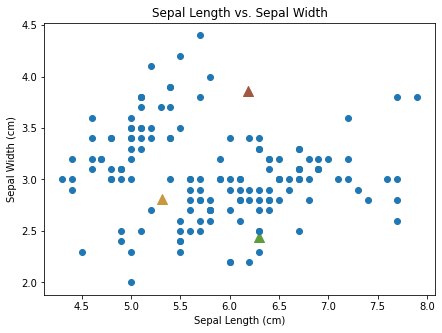

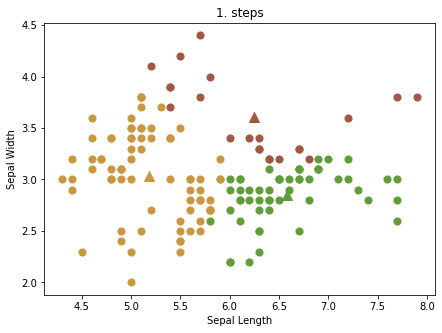

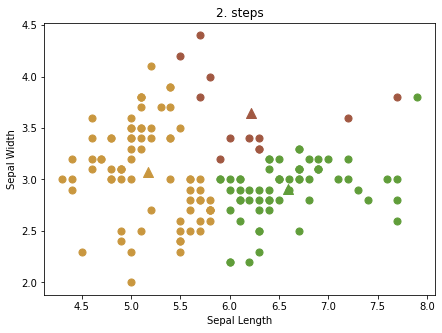

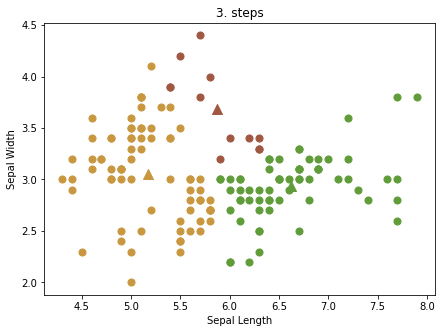

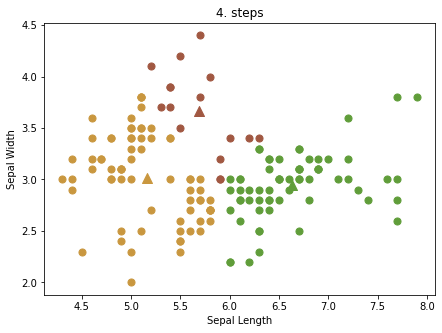

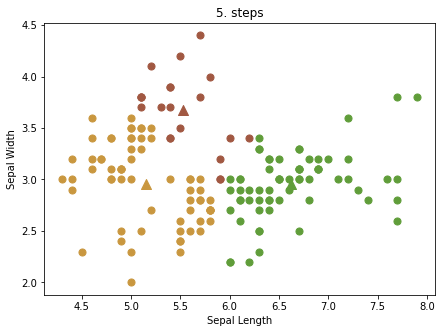

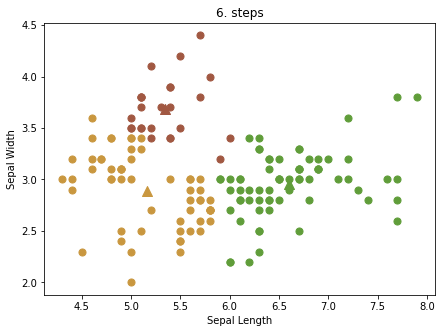

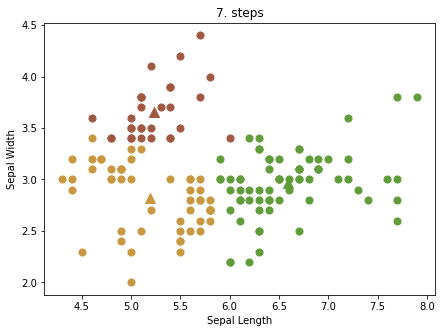

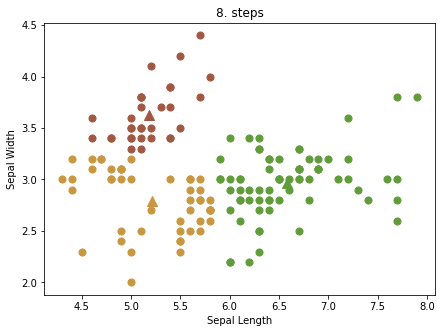

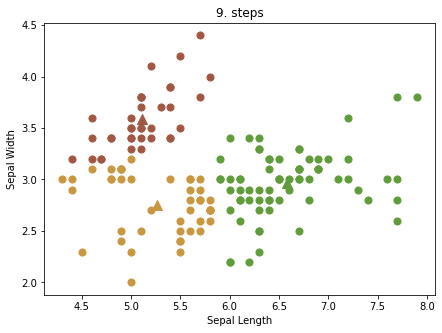

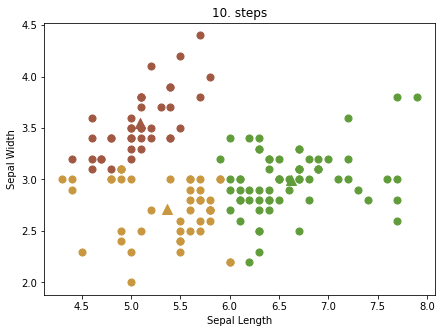

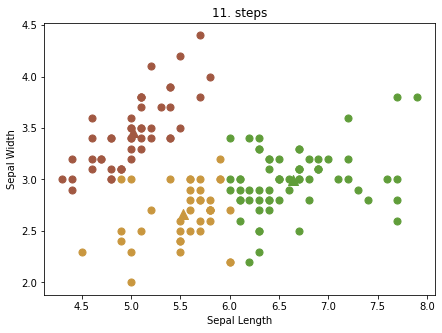

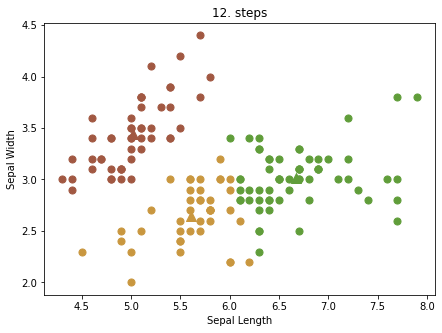

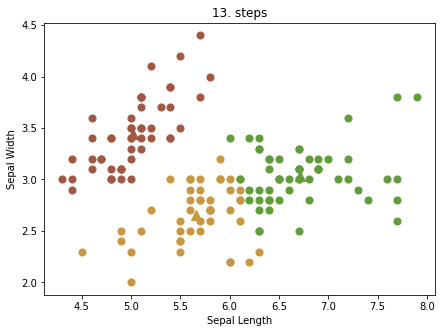

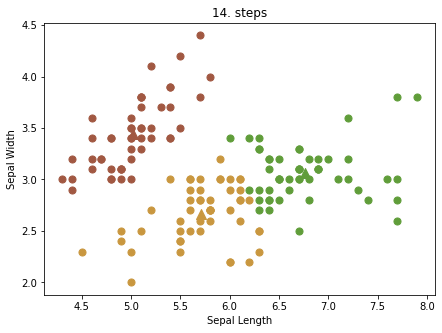

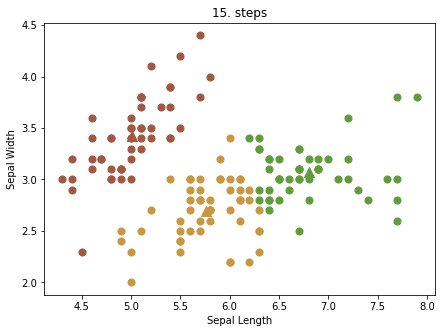

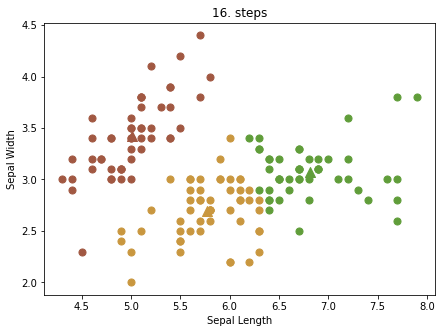

In [5]:
# Q4

colors = [] #it keeps color for scatter dote.

for i in range(k):
    colors.append('#%06X' % random.randint(0, 0xFFFFFF)) # it create random color k times

f = plt.figure(figsize=(7, 5)) # it crates figure
for i in range(k): # shows center of cluster in scatter
    plt.scatter(centerOfCluster[i][0], centerOfCluster[i][1], s=100, c=colors[i], marker='^')


plt.scatter(dataOfFlower["sepal_length"], dataOfFlower["sepal_width"])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title("Sepal Length vs. Sepal Width")
plt.show()


errors = [] # it keeps errors
centerOfLength=[] # it keeps center of lentgth
centerOfWidth=[]  # it keeps center of width
measureOfDistance = []

for i in range(k):
    measureOfDistance.append([0, 1]) # insert default value

for i in range(k):
    centerOfLength.append(0) # insert default value


for i in range(k):
    centerOfWidth.append(1) # insert default value

for replyTime in range(countOfReply): # it ends when limit of error smaller than thresh hold
    kinds = {} # it keeps kinds of flower
    for i in range(k):
        kinds[i] = []  # k Clusters Initialization

    for element in listOfElements: # it look for each flower
        if len(element) ==2  : #There are two values ​​for flowers. these are "sepal length" and "sepal width".
            # In addition, the color assignment of the flower takes place here, but every time it is checked so that a color value is not assigned to the end.
            element.append("color")
            for (i) in range(k):
                measureOfDistance[i] = distance(element, centerOfCluster[i])

            #each flower looks at its distance from the centers and these distances are kept in the list.
            # Then, whichever center the flower is closer to, its category changes and its color is updated.
            indexOfElement = measureOfDistance.index(min(measureOfDistance)) # new center index
            element[2] = colors[indexOfElement] # update color
            kinds[indexOfElement].append(element) # new flower added updated category

        elif len(element) == 3:
            for (i) in range(k):
                measureOfDistance[i] = distance(element, centerOfCluster[i])
                # each flower looks at its distance from the centers and these distances are kept in the list.
                # Then, whichever center the flower is closer to, its category changes and its color is updated.
            indexOfElement = measureOfDistance.index(min(measureOfDistance)) # new center index
            element[2] = colors[indexOfElement] #update color
            kinds[indexOfElement].append(element)# new flower added updated category

    error = 0 # it makes 0 in every replying times

    # Distance calculation for each cluster
    for j in kinds.keys():
        for point in kinds[j]:
            diff = distance(point, centerOfCluster[j])
            # each center is displaced according to the average of the positions of the flowers that belong to it.
            # Each time it advances further and further to the center.
            # If the distance traveled by each step is less than a certain value, the loop is broken.
            error += diff * diff
    errors.append(error)

    # Limit to stop algorithm when last error smaller then threshold
    if replyTime > 0:
        if (errors[replyTime - 1] - error) < limitOfError:
            break

    # Recalculation of centroids
    for indexOfElement in kinds:
        centerOfCluster[indexOfElement] = calculateMean(kinds[indexOfElement], indexOfElement, centerOfCluster)

    f= plt.figure(figsize=(7, 5))
    plt.title(str(replyTime + 1) + ". steps")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    for i in range(k):
        plt.scatter(centerOfCluster[i][0], centerOfCluster[i][1], s=100, c=colors[i], marker='^')

    for j in kinds.keys():
        for point in kinds[j]:# looks at the length and width values in each of the types in loop
            point_length = point[0] # set sepal length value
            point_width = point[1] # set sepal width value
            pColor = point[2] # set current color
            plt.scatter(point_length, point_width, s=50, c=pColor, marker='o')
    plt.show()


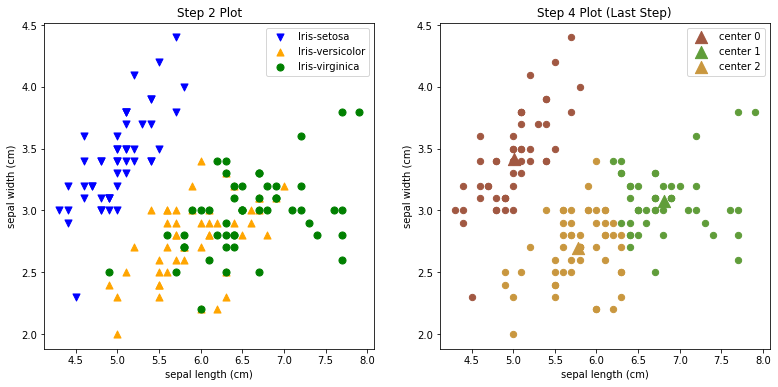

In [6]:
# Q5

plt.figure(figsize=(13, 6))

# Step 2
plt.subplot(1,2,1)
plt.title("Step 2 Plot")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(setosa["sepal_length"], setosa["sepal_width"] , s = 50, c = 'blue', marker='v', label = 'Iris-setosa')
plt.scatter(versicolor["sepal_length"], versicolor["sepal_width"] , s = 50, c = 'orange', marker='^', label = 'Iris-versicolor')
plt.scatter(virginica["sepal_length"], virginica["sepal_width"] , s = 50, c = 'green', marker='o', label = 'Iris-virginica')
plt.legend()

# Step 4
plt.subplot(1,2,2) # divide subplot
plt.title("Step 4 Plot (Last Step)")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
labels = [] # label for legend function
for i in range(k):
    labels.append('center ' + str(i)) # set default values

for i in range(k):
    plt.scatter(centerOfCluster[i][0], centerOfCluster[i][1], s=150, c=colors[i], marker='^',label = labels[i])

for j in kinds.keys():
    for point in kinds[j]: # looks at the length and width values in each of the types in loop
        point_length = point[0] # set sepal length value
        point_width = point[1] # set sepal width value
        pColor = point[2] # set current color
        plt.scatter(point_length, point_width, s=40, c=pColor, marker='o')
plt.legend() # it shows labels
plt.show()
# COMMENT FOR QUESTION 5
#There are very small differences between the colors of the actual values of the flowers or the categories and the coloration of the cluster
# structure created by the "k means" method. There is no 100% similarity. Since each flower was placed in a category belonging to the center
# closest to itself, flowers in different categories but close to each other were created as belonging to the same category.
# As the number of clusters created increases, the diversity within the flowers will also increase.